# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
amostra = get_sample(athletes, 'height', n=3000, seed=42)


In [7]:
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1811 to 5892
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  3000 non-null   float64
dtypes: float64(1)
memory usage: 46.9 KB


In [23]:
amostra.mean()

height    1.76678
dtype: float64

In [26]:
sct.shapiro(amostra)

(0.9961519837379456, 5.681722541339695e-07)

In [18]:
sct.shapiro(amostra)


(0.9961519837379456, 5.681722541339695e-07)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [24]:
#Hipóteses:
# H0--> a amostra segue uma distribuição normal
# H1 -- a amostra não segue uma distribuição normal

#a função q1 retorna 'True' quando a amostra é uma distribuição normal e 'False' quando não é uma distribuição
#normal, ou seja, rejeita H0

#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função faz uma comparação entre o valor de alpha e o valor de p-value, retornando um valor booleano
def q1(amostra):
    alpha = 0.05
    teste_est, p_value = sct.shapiro(amostra)
    return alpha<p_value

In [21]:
q1(amostra)

False

In [10]:
sct.shapiro(amostra)

(0.9961519837379456, 5.681722541339695e-07)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [48]:
import statsmodels.api as sm

/home/vinicius/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


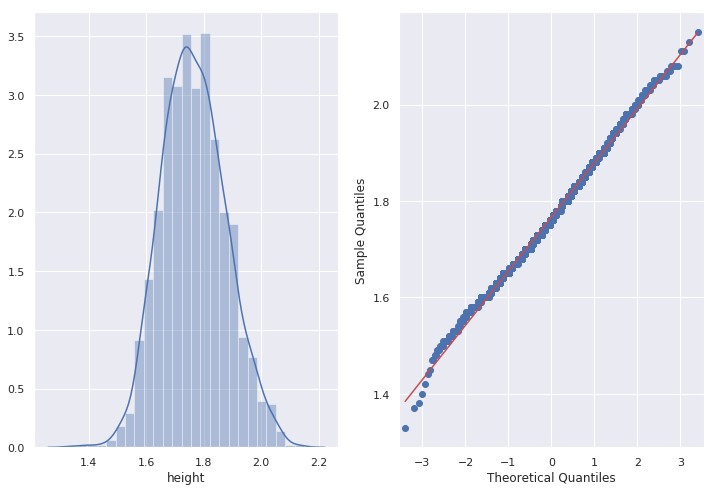

In [15]:
fig, ax =plt.subplots(1,2)
sns.distplot(amostra, bins= 25,ax=ax[0]);
qqplot(amostra, line='s', ax=ax[1]);
fig.show()

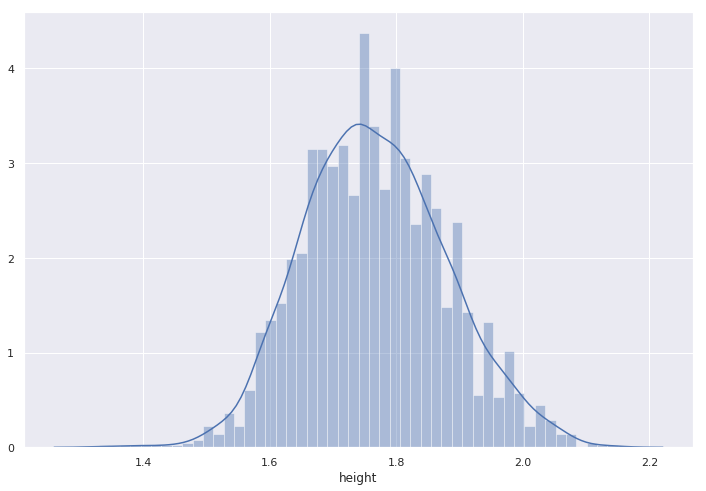

In [17]:
#histograma da amostra selecionada com 50 bins
sns.distplot(amostra, bins=50)

#### As análises tanto do histograma como também do qqplot, mostram uma distribuição aparentemente normal, o que difere do resultado trazido pelo cálculo de shapiro-wilk. Possivelmente, essa diferença se deva a alguns outilers. Estes outiliers podem ser melhor visualizados ao se especificar uma quantidade de bins=50 para o histograma. Neste  caso, é possível verificar que há picos muito grandes em torno da média.

#### Dado que o valor de p-value é muito baixo, para que o resultado do teste seja diferente (True --> distribuição normal), o nível de significância teria que ser bastante reduzido (0.00005%, por exemplo), o que implica, na prática em colocar a aceitação da Hipótese nula (H0) sob toda a curva de probabilidade, não deixando margem para a rejeição da mesma.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [18]:
#Hipóteses:
# H0--> a amostra é uma distribuição normal
# H1 -- a amostra não segue uma distribuição normal

#a função q1 retorna 'True' quando a amostra é uma distribuição normal e 'False' quando não é uma distribuição
#normal, ou seja, rejeita H0

#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função faz uma comparação entre o valor de alpha e o valor de p-value, retornando um valor booleano

def q2():
    alpha = 0.05
    teste_est, p_value = sct.jarque_bera(amostra)
    return alpha<p_value

__Para refletir__:

* Esse resultado faz sentido?

#### Sim. O teste de normalidade de Shapiro-wilk é confiável para amostras de tamanho até 5000. O teste de Jarque-Bera, por sua vez, é confiável para amostras de tamanho superior a 2000. A amostra utilizada foi de 3000. Desta forma, é esperado que ambos os teste deem resultados iguais.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [25]:
amostra_weight = get_sample(athletes, ['weight'], n=3000, seed=42)

In [24]:
#Hipóteses:
# H0--> a amostra é uma distribuição normal
# H1 -- a amostra não segue uma distribuição normal

#a função q1 retorna 'True' quando a amostra é uma distribuição normal e 'False' quando não é uma distribuição
#normal, ou seja, rejeita H0

#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função faz uma comparação entre o valor de alpha e o valor de p-value, retornando um valor booleano

def q3(amostra):
    alpha = 0.05
    teste_est, p_value = sct.normaltest(amostra)
    return bool(alpha<p_value)

In [25]:
q3(amostra_weight)

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

/home/vinicius/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


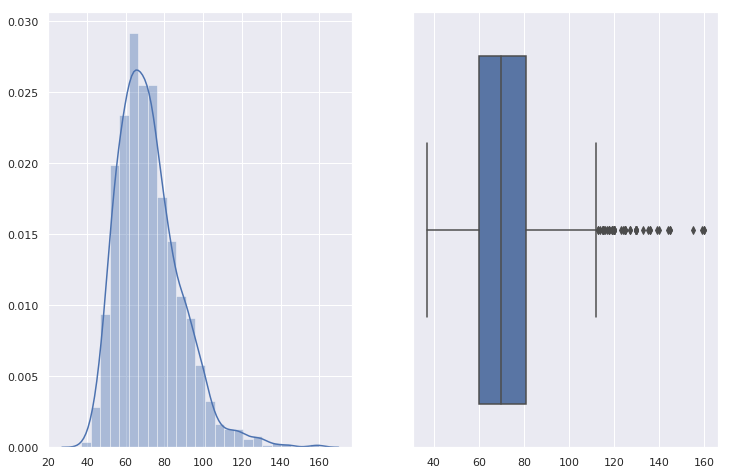

In [27]:
fig2, ax =plt.subplots(1,2)
sns.distplot(amostra_weight, bins= 25,ax=ax[0]);
sns.boxplot(amostra_weight, ax=ax[1]);
fig2.show()

In [38]:
#indica a quantidade de dados que estão acima da média
print('Quantidade de dados acima da média:',(amostra_weight['weight']>amostra_weight['weight'].mean()).sum())

Quantidade de dados acima da média: 1290


In [39]:
#indica a quantidade de dados que estão abaixo da média
print('Quantidade de dados abaixo da média:',(amostra_weight['weight']<amostra_weight['weight'].mean()).sum())

Quantidade de dados abaixo da média: 1710


#### Os gráficos (histograma e boxplot) indicam haver uma maior concentração dos dados ao lado esquerdo da média. Desta forma, há uma maior probabilidade de um dado qualquer estar abaixo da média do que acima da mesma, sendo um indicativo de que não se trata de uma distribuição normal. 

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [41]:
#Hipóteses:
# H0--> a amostra é uma distribuição normal
# H1 -- a amostra não segue uma distribuição normal

#a função q1 retorna 'True' quando a amostra é uma distribuição normal e 'False' quando não é uma distribuição
#normal, ou seja, rejeita H0

#a variável 'transf_log' recebe o valor dos dados transformados logaritmicamente em base 10
#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função faz uma comparação entre o valor de alpha e o valor de p-value, retornando um valor booleano


def q4(amostra):
    transf_log = np.log10(amostra)
    alpha = 0.05
    teste_est, p_value = sct.normaltest(transf_log)
    return bool(alpha<p_value)

In [42]:
q4(amostra_weight)

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

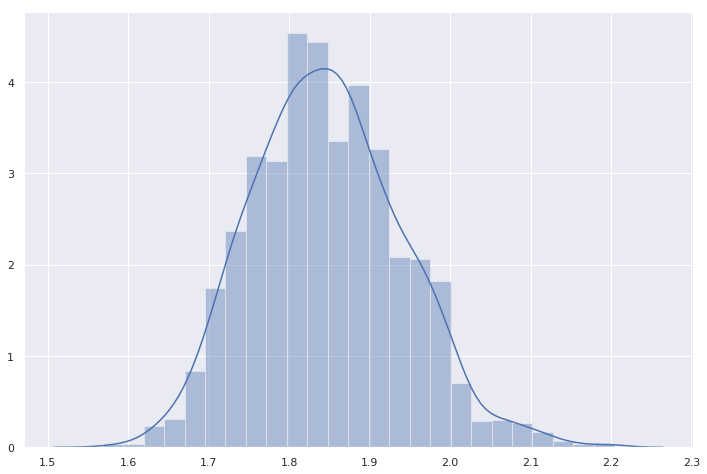

In [48]:
sns.distplot(np.log10(amostra_weight),bins=25)

#### A transformação logarítmica em base 10 dos dados, possibilitou que a curva se tornasse mais parecida com uma normal. Contudo, é possível verificar no histograma que ao lado direito da média, há uma tendência dos dados serem mais esparsos, o que corrobora com o resultado trazido pela função.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [6]:
bra = pd.DataFrame(athletes.loc[athletes['nationality']=='BRA'])
usa = pd.DataFrame(athletes.loc[athletes['nationality']=='USA'])
can = pd.DataFrame(athletes.loc[athletes['nationality']=='CAN'])

In [52]:
#Hipóteses:
# H0--> as amostras são estatisticamente iguais
# H1 -- a amostra não são estatisticamente iguais

#a função q1 retorna 'True' quando as amostras são estatisticamente iguais e 'False' do contrário, ou seja,
#rejeita H0

#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função faz uma comparação entre o valor de alpha e o valor de p-value, retornando um valor booleano

def q5(df):
    alpha = 0.05
    teste_est, p_value = sct.ttest_ind(bra['height'].dropna(),usa['height'].dropna())
    return bool(alpha<p_value)

In [53]:
q5(athletes)

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [54]:
#Hipóteses:
# H0--> as amostras são estatisticamente iguais
# H1 -- as amostras não são estatisticamente iguais

#a função q1 retorna 'True' quando as amostras são estatisticamente iguais e 'False' do contrário, ou seja,
#rejeita H0

#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função faz uma comparação entre o valor de alpha e o valor de p-value, retornando um valor booleano

def q6(df):
    alpha = 0.05
    teste_est, p_value = sct.ttest_ind(bra['height'].dropna(),can['height'].dropna())
    return bool(alpha<p_value)

In [55]:
q6(athletes)

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [31]:
#a variável 'teste_est' recebe o valor do teste estatístico
#a variável 'p_value' recebe o valor do p-value

#por fim, a função traz o valor do 'p-value' arredondado para 8 casas decimais.

#Observação: para o parâmetro 'equal_var' foi adotado o valor 'False', pois há uma ligeira diferença entre as variâncias 
#de ambas as amostras, o que impacta no resultado e consequentemente no valor esperado pelo teste feito pela
#Codenation

def q7(df):
    teste_est, p_value = sct.ttest_ind(usa['height'].dropna(),can['height'].dropna(), equal_var=False)
    return round(p_value,8)

In [32]:
q7(athletes)

0.00046601

In [9]:
sct.ttest_ind(usa['height'].dropna(),can['height'].dropna(), equal_var=False)

Ttest_indResult(statistic=3.516987632488539, pvalue=0.00046601293473888875)

__Para refletir__:

* O resultado faz sentido?
* **Resposta**: Para responder, devemos considerar esse resultado a partir de determinada hipótese e em um dado nível de significância, pois, o resultado por si só não diz muita coisa.


* Você consegue interpretar esse p-valor?
* **Resposta**: Considerando a hipótese nula (H0) de que as médias das amostras são iguais em um nível de significância de 0.05, poderíamos considerar a rejeição da hipótese nula, ou seja, aceitamos considerar que a média das amostras não é igual.


* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?
* **Resposta**: Considerando as hipóteses:
                Ho: as médias das hipóteses são iguais;
                H1: as médias das hipóteses são diferentes.
  Utilizaremos um teste bicaudal, em que a região crítica de rejeição de H0 está tanto à esquerda, quanto à direita da média. Estimaremos o p-value a partir da utilização da função SF (survival function) que dá o valor de 1-CDF (cumulative distribuction funcion) e dobraremos este valor, visto ser um teste bicaudal.

In [24]:
#calculando o valor de T-test
teste_est= sct.ttest_ind(usa['height'].dropna(),can['height'].dropna(), equal_var=False)

In [34]:
#a variável teste_est traz uma tupla como resultado (statistic e p-value). Neste caso utilizaremos apenas o valor
#statistic (teste_est[0]) e estimaremos o p-value através da função SF, retornando o dobro deste valor, como
#explicado logo acima.
p_value = round(sct.norm.sf(teste_est[0])*2,8)

In [35]:
print ("p_value estimado: ",p_value)

p_value estimado:  0.00043647
